# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [31]:
# Importando a biblioteca matplotlib.pyplot e módulo cm para criação de gráficos e manipulação de cores
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Importando a biblioteca numpy para manipulação de vetores e matrizes numéricas
import numpy as np

# Importando a biblioteca pandas para manipulação de dados em formato de tabela (dataframes)
import pandas as pd

# Importando a biblioteca seaborn para criação de visualizações estatísticas
import seaborn as sns

# Importando a biblioteca warnings para ignorar avisos durante a execução do código
import warnings
warnings.filterwarnings("ignore")

# Importando funções de pré-processamento do sklearn para escalar os dados e aplicar transformações de potência
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, Normalizer

# Importando a biblioteca KMeans do sklearn para realizar o algoritmo de agrupamento não-supervisionado
from sklearn.cluster import KMeans

# Importando funções estatísticas para realizar análise de variância (ANOVA) e teste de Tukey
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Importando funções do sklearn.metrics para avaliar a qualidade dos agrupamentos e calcular distâncias entre pares de exemplos
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances, davies_bouldin_score, calinski_harabasz_score

# Importando a classe Pipeline do sklearn para construir sequências de transformações nos dados
from sklearn.pipeline import Pipeline

# Importando o visualizador de cotovelo (Elbow) do Yellowbrick, uma biblioteca de visualização 
# com suporte específico para Machine Learning
from yellowbrick.cluster import KElbowVisualizer

# Importando PCA e t-SNE do sklearn para reduzir a dimensionalidade dos dados
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
# Importando o arquivo csv
ideb = pd.read_csv('ideb.zip', compression='zip', header=0, sep=',', quotechar='"')

In [33]:
# Visualizando as primeiras linhas do dataframe
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [34]:
# Filtrar os dados referentes ao ano de 2019
dados_2019 = ideb[ideb['ano'] == 2019]

# Agrupar os dados por estado e calcular a média e reset index
dados_agrupados = dados_2019.groupby('sigla_uf').mean().reset_index()

# Exibir o resultado
dados_agrupados.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125


### Atividade 3: Padronize os dados.

In [35]:
# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Selecionar os dados a serem padronizados
dados_selecionados = dados_agrupados[['taxa_aprovacao', 'nota_saeb_matematica',
                                       'nota_saeb_lingua_portuguesa',
                                         'ideb']]

# Padronizar os dados
dados_padronizados = scaler.fit_transform(dados_selecionados)

# Criar um novo DataFrame com os dados padronizados
df_padronizado = pd.DataFrame(dados_padronizados, columns=dados_selecionados.columns)

# Exibir o resultado
df_padronizado.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,-0.025280,0.080727,-0.016434,0.092154
1,0.801179,-0.437122,-0.531887,-0.201424
2,-0.426168,-1.474271,-1.443233,-1.063297
3,-1.670713,-1.889188,-1.751891,-1.674063
4,-1.323101,-0.713999,-0.626401,-1.060175


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

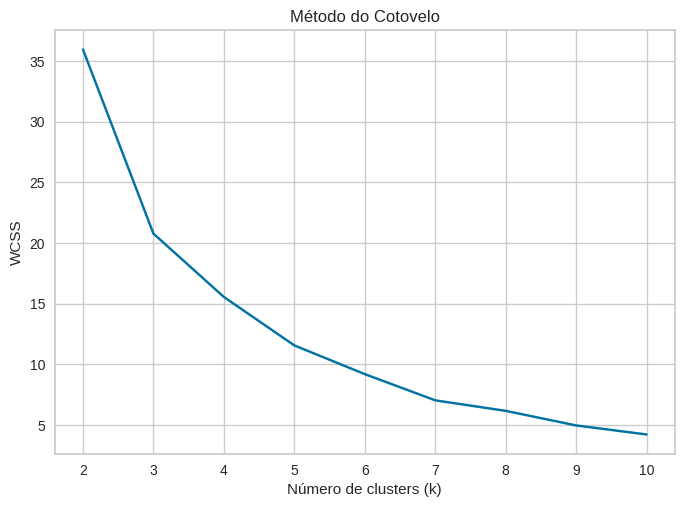

In [36]:
# Lista para armazenar os valores de WCSS (Within-Cluster Sum of Squares)
wcss = []

# Testar diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_padronizado)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(2, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.show()

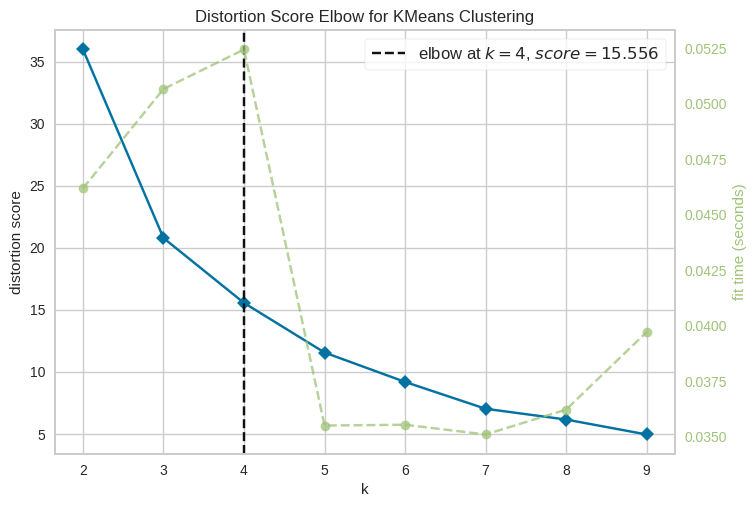

In [37]:
# Inicializando o modelo KMeans com o número especificado de clusters (nclus), 
# usando o método de inicialização 'k-means++' para escolher os centróides iniciais de maneira inteligente 
# para acelerar a convergência, e definindo um número de inicializações de tempo (n_init=10), 
# que é o número de vezes que o algoritmo K-means será executado com diferentes sementes de centróide
# O parâmetro random_state=42 é usado para garantir que a saída do modelo seja a mesma sempre que o script for executado
km = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# Inicializando o visualizador de cotovelo (Elbow) com o modelo KMeans e um intervalo de número de clusters a considerar (k=(2,10))
visualizer = KElbowVisualizer(km, k=(2,10))

# Ajustando o visualizador aos dados padronizados (df_padronizado)
visualizer.fit(df_padronizado)

# Mostrando o gráfico do visualizador de cotovelo. Este gráfico representa a soma das distâncias quadradas 
# de cada ponto ao seu centróide para um intervalo de valores de k. O "cotovelo" (elbow) na curva, geralmente,
# indica um bom número de clusters a ser escolhido para o modelo KMeans.
visualizer.show();

A "pontuação" ou "score" que você vê (15.556) corresponde à soma das distâncias quadradas dentro do cluster para k=4. Este é o ponto onde adicionar mais clusters não resulta em uma melhoria significativa na soma das distâncias quadradas dentro do cluster, que é o que queremos minimizar no K-means.

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

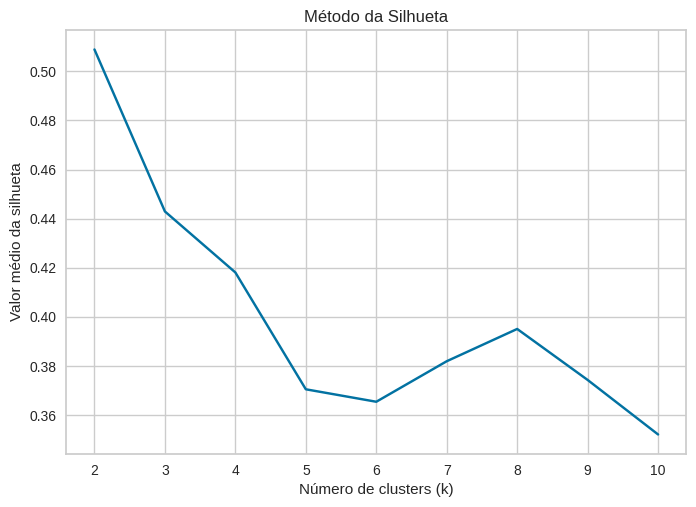

In [38]:
# Lista para armazenar os valores de silhouette
silhouette_vals = []
k_values = range(2, 11)

# Testar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_padronizado)
    silhouette_avg = silhouette_score(df_padronizado, cluster_labels)
    silhouette_vals.append(silhouette_avg)

# Plotar o gráfico do método da silhueta
plt.plot(k_values, silhouette_vals)
plt.title('Método da Silhueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Valor médio da silhueta')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5088756036604428
For n_clusters = 3, the average silhouette_score is : 0.44292561895191096
For n_clusters = 4, the average silhouette_score is : 0.41809143611254185
For n_clusters = 5, the average silhouette_score is : 0.3705202048317957
For n_clusters = 6, the average silhouette_score is : 0.3654455079547478


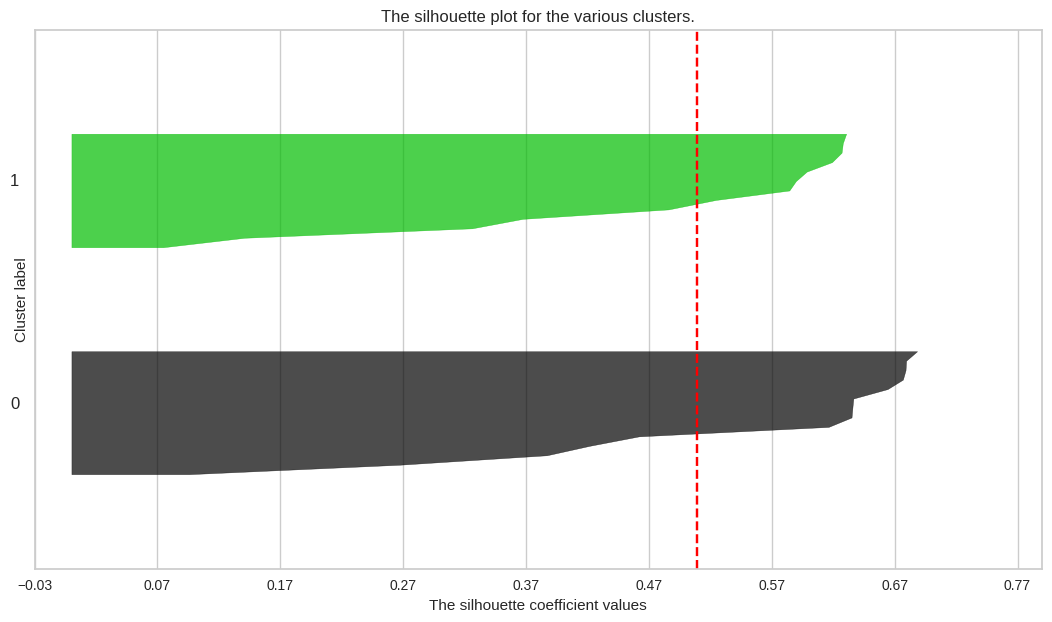

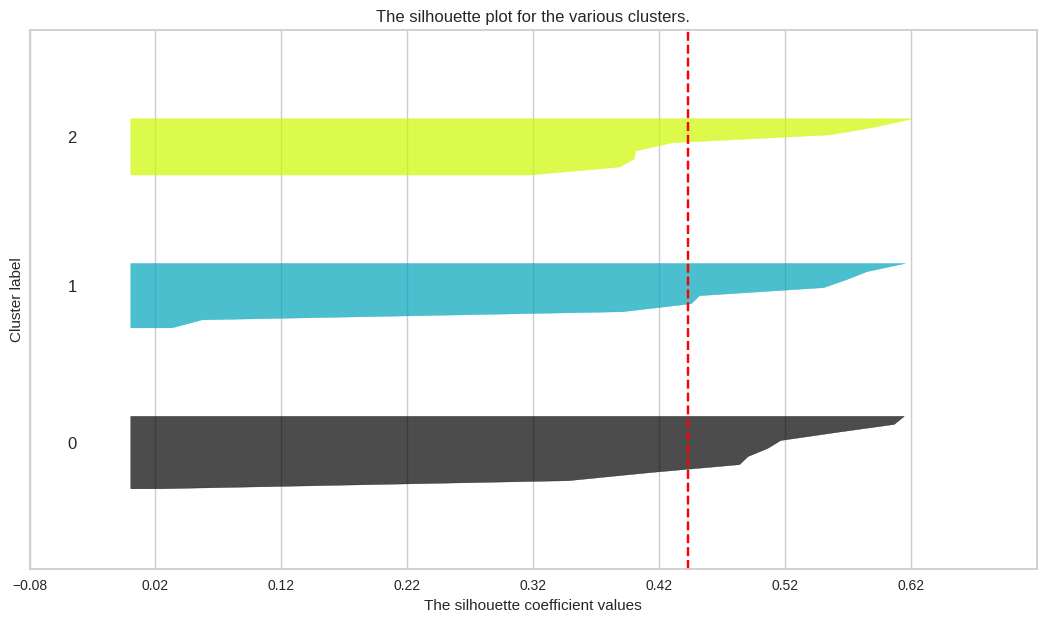

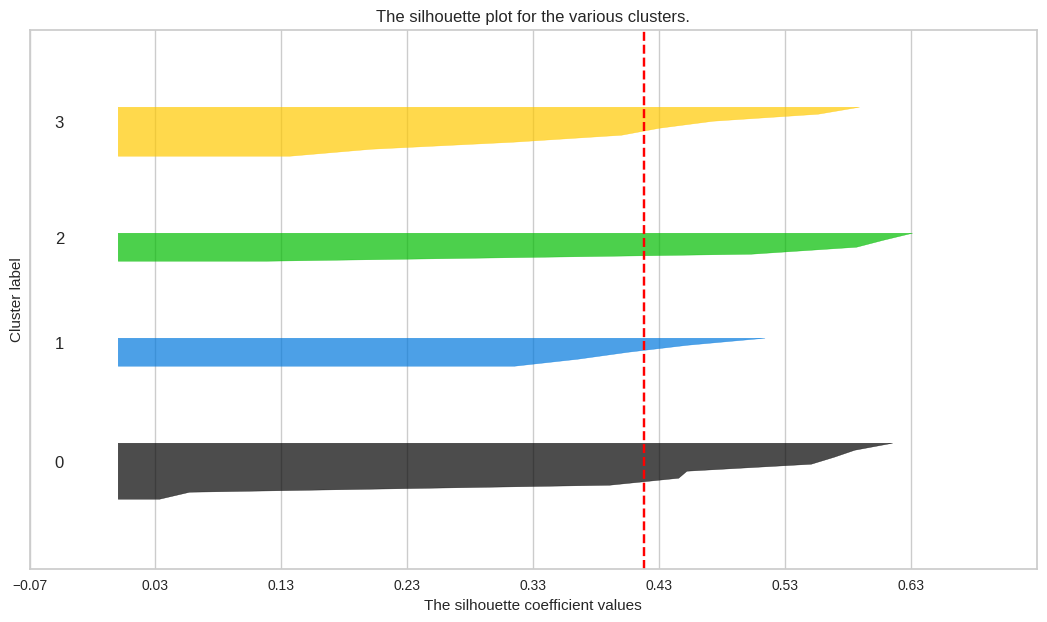

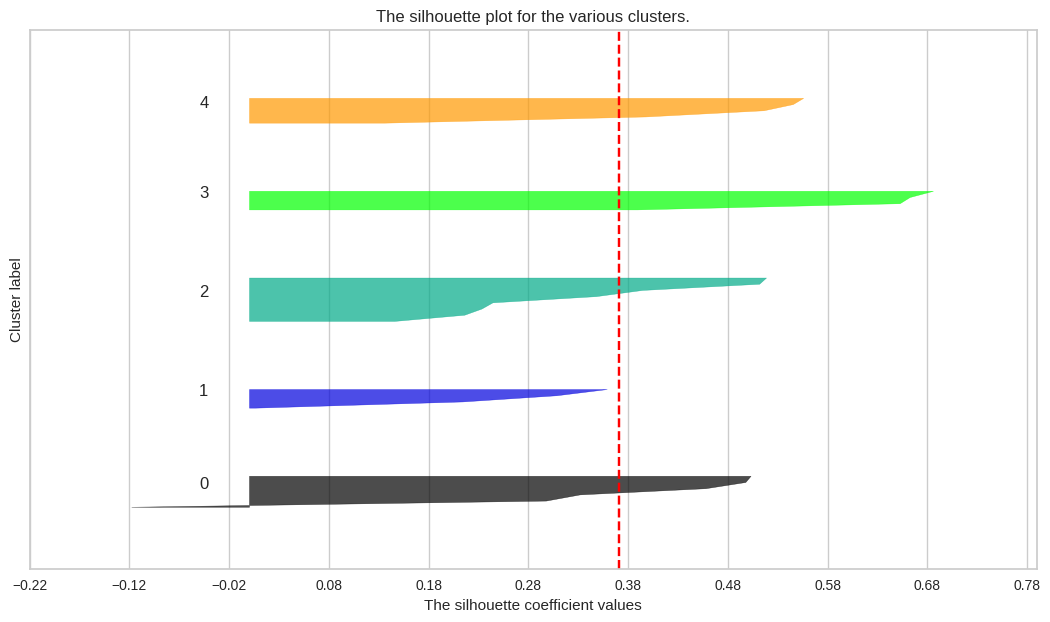

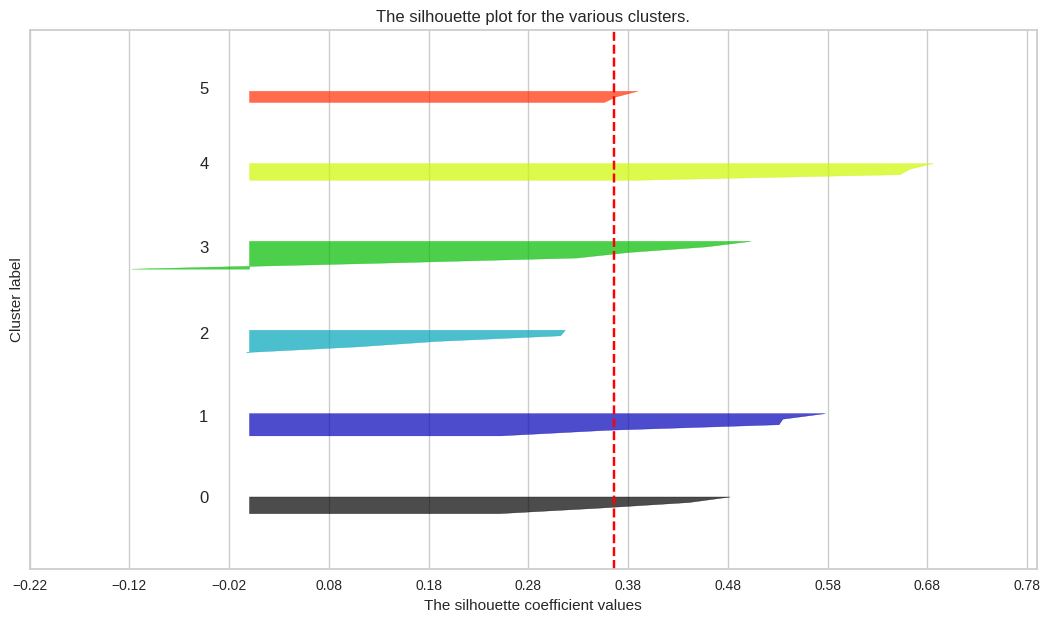

In [39]:
# Copiando o dataframe padronizado para um novo dataframe df_sill 
df_sill = df_padronizado.copy()

# Definindo o intervalo de números de clusters que queremos testar (de 1 a 6)
range_clust = list(range(1,7))

# Criando uma lista vazia para armazenar a média das pontuações de silhueta para cada número de clusters
avg_silhouette = []

# Loop para cada valor de número de clusters no intervalo definido
for nclus in range_clust:

    # Pular a iteração se o número de clusters for 1 (a análise de silhueta não é definida para um único cluster)
    if nclus == 1:
        continue
    
    # Criando uma figura para plotar o gráfico de silhueta
    fig = plt.figure(figsize=(13, 7))

    # Inicializando o objeto KMeans com o valor atual de n_clusters e uma semente de gerador aleatório fixa (42)
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=10, random_state=42)

    # Fazendo o ajuste (fit) do KMeans aos dados e obtendo os rótulos de cluster para cada ponto
    cluster_labels = kmclust.fit_predict(df_sill)

    # Calculando a pontuação média de silhueta para todos os pontos
    silhouette_avg = silhouette_score(df_sill, cluster_labels)

    # Adicionando a pontuação média de silhueta à lista avg_silhouette
    avg_silhouette.append(silhouette_avg)
    
    # Imprimindo a pontuação média de silhueta para o número atual de clusters
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Calculando a pontuação de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(df_sill, cluster_labels)

    # y_lower é usado para delimitar a parte inferior de cada gráfico de silhueta de cluster individual
    y_lower = 10

    # Loop para cada cluster criado pelo KMeans
    for i in range(nclus):

        # Agregando as pontuações de silhueta para amostras pertencentes ao cluster i, e ordenando-as
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # y_upper é usado para delimitar a parte superior de cada gráfico de silhueta de cluster individual
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Preenchendo o gráfico de silhueta com cor e rótulo do cluster
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Atualizando y_lower para o próximo gráfico de silhueta de cluster
        y_lower = y_upper + 10  # 10 para as 0 amostras

    # Adicionando título ao gráfico
    plt.title("The silhouette plot for the various clusters.")

    # Nomeando os eixos do gráfico
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # Adicionando uma linha vertical no gráfico para representar a média das pontuações de silhueta para todos os clusters
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Definindo os limites do eixo x para a faixa de valores de coeficiente de silhueta (-1, 1)
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # Definindo os limites do eixo y para acomodar todos os gráficos de silhueta de cluster
    plt.ylim([0, len(df_sill) + (nclus + 1) * 10])

    # Limpando os rótulos / ticks do eixo y e definindo os ticks do eixo x
    plt.yticks([])  
    plt.xticks(np.arange(xmin, xmax, 0.1))


In [40]:
# Definindo a função return_metrics
def return_metrics(n_clusters, dataset):
    """
    Retorna os scores da silhueta, Davies-Bouldin e Calinski-Harabasz.
    
    Parâmetros:
        n_clusters (int): número de clusters do KMeans
        dataset (pandas.core.frame.DataFrame): dataframe para a clusterização
    
    Retorna:
        si (float): score da silhueta
        db (float): score de Davies-Bouldin
        ch (float): score de Calinski-Harabasz
    """
    # Inicializando o KMeans com n_clusters e uma semente aleatória fixa (42)
    kmean = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    
    # Ajustando o KMeans ao dataset e obtendo os rótulos dos clusters
    labels = kmean.fit_predict(dataset)
    
    # Calculando o score da silhueta, Davies-Bouldin e Calinski-Harabasz
    si = silhouette_score(dataset, labels, metric='euclidean', random_state=1234)
    db = davies_bouldin_score(dataset, labels)
    ch = calinski_harabasz_score(dataset, labels)
    
    return si, db, ch


# Listas para armazenar o número de clusters e os scores das métricas
n_clusters, si_list, db_list, ch_list = list(), list(), list(), list()

# Loop para calcular e armazenar as métricas para um intervalo de valores de k de 2 a 10
for i in range(2, 10):
    si, db, ch = return_metrics(i, df_padronizado)
    n_clusters.append(int(i))
    si_list.append(si)
    db_list.append(db)
    ch_list.append(ch)

# Criando um DataFrame do pandas para armazenar os resultados
metrics = pd.DataFrame(np.column_stack((n_clusters, si_list, db_list, ch_list)), columns=['N° Clusters', 'silhouette', 'davies_bouldin', 'calinski_harabasz'])
metrics.head(10) # Exibindo as primeiras 7 linhas do DataFrame


,N° Clusters,silhouette,davies_bouldin,calinski_harabasz
0,2.0,0.508876,0.665900,50.060770
1,3.0,0.442926,0.720641,50.363858
2,4.0,0.418091,0.703307,45.558741
3,5.0,0.370520,0.801837,45.888014
4,6.0,0.365446,0.845300,45.148264
5,7.0,0.381946,0.764340,47.885739
6,8.0,0.395084,0.658075,44.868026
7,9.0,0.374326,0.613521,46.761783


silhouette: Medida de consistência dentro dos clusters. Os valores variam de -1 a 1. Um valor alto indica que a amostra está bem adequada ao seu próprio cluster e mal adequada aos clusters vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração do cluster é apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração do cluster pode ter clusters muito grandes ou sobrepostos.

davies_bouldin: Medida de similaridade média entre clusters. Quanto menor o valor de Davies-Bouldin, melhor. Zero é o valor mais baixo possível. Valores mais baixos indicam uma melhor partição.

calinski_harabasz: Medida da dispersão entre clusters em relação à dispersão dentro do cluster. Valores mais altos indicam melhor clusterização.

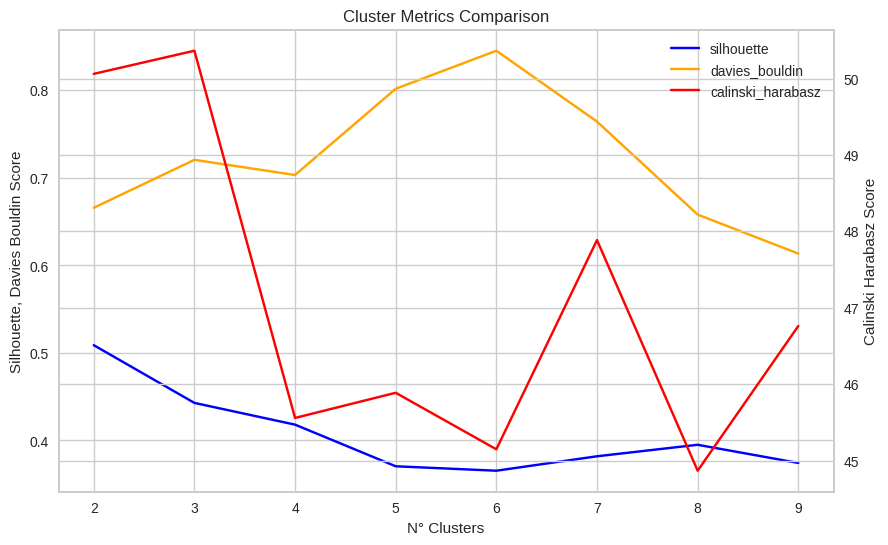

In [41]:
import matplotlib.lines as mlines

# Cria uma nova figura com um único subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Desenha duas linhas no mesmo gráfico, uma para o score da silhueta e outra para o score de Davies Bouldin
sns.lineplot(data=metrics, x='N° Clusters', y='silhouette', ax=ax1, color='blue')
sns.lineplot(data=metrics, x='N° Clusters', y='davies_bouldin', ax=ax1, color='orange')

# Cria um segundo eixo Y para o score de Calinski Harabasz
ax2 = ax1.twinx()
sns.lineplot(data=metrics, x='N° Clusters', y='calinski_harabasz', ax=ax2, color='red')

# Define o título e os rótulos dos eixos Y
ax1.set_title('Cluster Metrics Comparison')
ax1.set_ylabel('Silhouette, Davies Bouldin Score')
ax2.set_ylabel('Calinski Harabasz Score')

# Cria as linhas de legenda para cada métrica
blue_line = mlines.Line2D([], [], color='blue', label='silhouette')
orange_line = mlines.Line2D([], [], color='orange', label='davies_bouldin')
red_line = mlines.Line2D([], [], color='red', label='calinski_harabasz')

# Adiciona a legenda ao gráfico
plt.legend(handles=[blue_line, orange_line, red_line])

# Exibe o gráfico
plt.show()

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [42]:
# Definir o valor de k escolhido
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(df_padronizado)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

dados_selecionados['sigla_uf'] = dados_agrupados['sigla_uf']

# Exibir o resultado
dados_selecionados.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,cluster,sigla_uf
0,88.561184,245.253478,237.995942,4.671739,3,AC
1,92.081591,237.883189,231.412708,4.509295,3,AL
2,86.853550,223.121965,219.773218,4.032397,0,AM
3,81.552252,217.216667,215.831111,3.694444,0,AP
4,83.032948,233.942537,230.205596,4.034125,0,BA


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

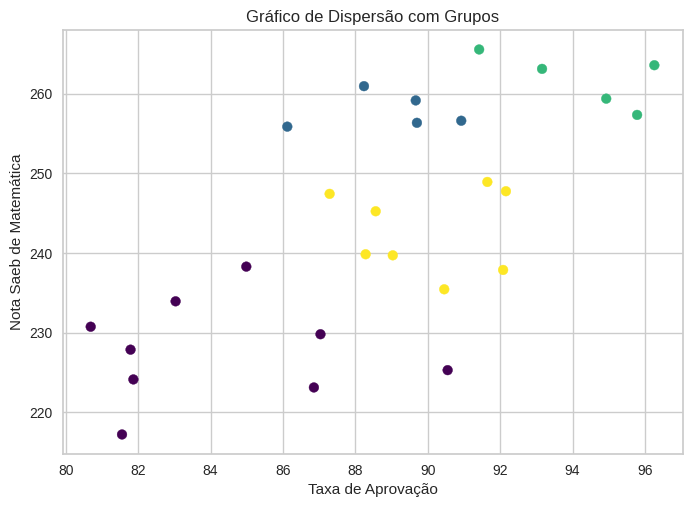

In [43]:
# Criar o gráfico de dispersão destacando cada grupo
plt.scatter(dados_selecionados['taxa_aprovacao'], dados_selecionados['nota_saeb_matematica'], c=dados_selecionados['cluster'],
            cmap='viridis')
plt.xlabel('Taxa de Aprovação')
plt.ylabel('Nota Saeb de Matemática')
plt.title('Gráfico de Dispersão com Grupos')
plt.show()

### Atividade 8: Quais são os estados de cada grupo?

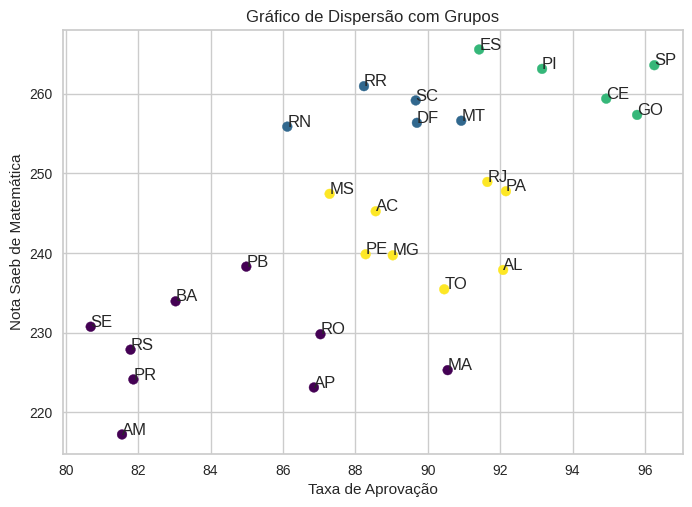

In [44]:
# Criar o gráfico de dispersão destacando cada grupo
plt.scatter(dados_selecionados['taxa_aprovacao'], dados_selecionados['nota_saeb_matematica'], c=dados_selecionados['cluster'],
             cmap='viridis')
plt.xlabel('Taxa de Aprovação')
plt.ylabel('Nota Saeb de Matemática')
plt.title('Gráfico de Dispersão com Grupos')

estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# Adicionar os nomes dos estados nos pontos do gráfico
for i, estado in enumerate(estados):
    plt.annotate(estado, (dados_selecionados['taxa_aprovacao'][i], dados_selecionados['nota_saeb_matematica'][i]))

plt.show()

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

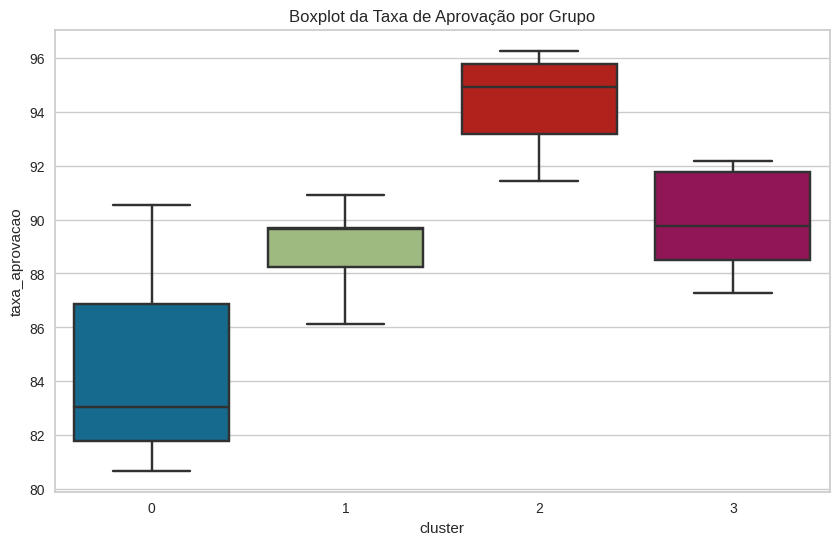

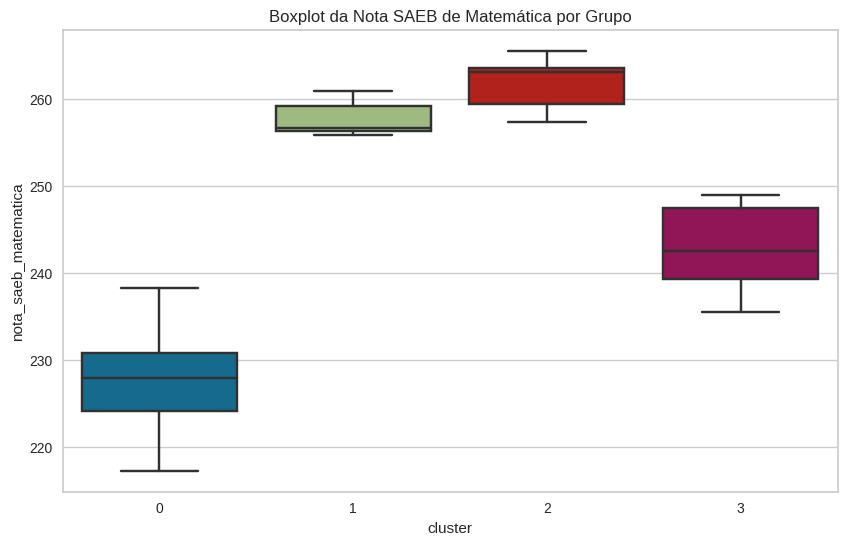

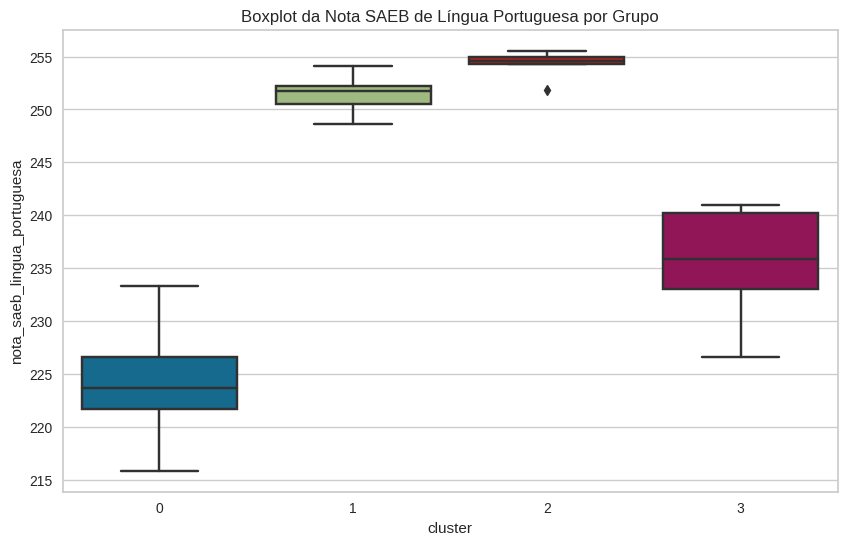

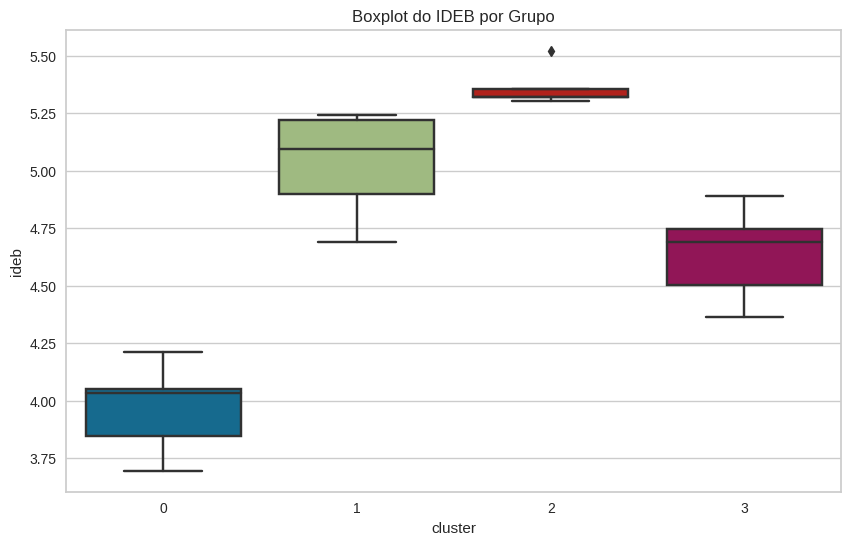

In [45]:
# Criar o boxplot por grupo usando o Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='taxa_aprovacao')
plt.title('Boxplot da Taxa de Aprovação por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='nota_saeb_matematica')
plt.title('Boxplot da Nota SAEB de Matemática por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='nota_saeb_lingua_portuguesa')
plt.title('Boxplot da Nota SAEB de Língua Portuguesa por Grupo')

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_selecionados, x='cluster', y='ideb')
plt.title('Boxplot do IDEB por Grupo')

plt.show()

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [46]:
# Realizar a ANOVA entre os grupos
anova_results = {}
for coluna in ['taxa_aprovacao', 'nota_saeb_matematica',
                'nota_saeb_lingua_portuguesa',
                  'ideb']:
    grupos = []
    for grupo in range(k):
        grupos.append(dados_selecionados[dados_selecionados['cluster'] == grupo][coluna])
    f_value, p_value = f_oneway(*grupos)
    anova_results[coluna] = {'F-value': f_value, 'p-value': p_value}

# Exibir os resultados da ANOVA
for coluna, resultados in anova_results.items():
    print(f'{coluna}:')
    print(f'  F-value: {resultados["F-value"]}')
    print(f'  p-value: {resultados["p-value"]}')
    if resultados["p-value"] < 0.05:
        print("  Os grupos são estatisticamente distintos.")
    else:
        print("  Não há evidência estatística de diferença significativa entre os grupos.")
    print()

taxa_aprovacao:
  F-value: 18.657633579530927
  p-value: 2.3316741103041923e-06
  Os grupos são estatisticamente distintos.

nota_saeb_matematica:
  F-value: 66.62845686480554
  p-value: 1.7054385010727915e-11
  Os grupos são estatisticamente distintos.

nota_saeb_lingua_portuguesa:
  F-value: 70.08413123405559
  p-value: 1.0134076242124102e-11
  Os grupos são estatisticamente distintos.

ideb:
  F-value: 84.55936557297234
  p-value: 1.433670943879008e-12
  Os grupos são estatisticamente distintos.



Resultado do Teste ANOVA: O teste ANOVA (Análise de Variância) foi realizado para determinar se os grupos formados pelos clusters são estatisticamente diferentes entre si. Com base nos resultados, todas as variáveis apresentaram diferenças significativas entre os clusters.

In [47]:
# Realizar o teste de Tukey HSD
tukey_results = {}
for coluna in ['taxa_aprovacao', 'nota_saeb_matematica',
                'nota_saeb_lingua_portuguesa',
                  'ideb']:
    tukey_result = pairwise_tukeyhsd(dados_selecionados[coluna], dados_selecionados['cluster'])
    tukey_results[coluna] = tukey_result

# Exibir os resultados do teste de Tukey HSD
for coluna, resultados in tukey_results.items():
    print(f'{coluna}:')
    print(resultados)
    print()

taxa_aprovacao:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   4.6687 0.0134  0.8241  8.5132   True
     0      2  10.0492  0.001  6.2047 13.8938   True
     0      3   5.6774  0.001  2.3281  9.0266   True
     1      2   5.3806 0.0118  1.0213  9.7399   True
     1      3   1.0087 0.8889 -2.9207  4.9381  False
     2      3  -4.3719 0.0254 -8.3013 -0.4425   True
----------------------------------------------------

nota_saeb_matematica:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  29.9762  0.001  22.3299  37.6225   True
     0      2   33.987  0.001  26.3407  41.6333   True
     0      3  14.9626  0.001   8.3014  21.6238   True
     1      2   4.0107 0.5767  -4.6594  12.6808  False
     1      3 -15.0136  0.001 -22.8287  -7.198

Os resultados para cada variável são os seguintes:

1. **Taxa de Aprovação:** Todos os grupos são significativamente diferentes uns dos outros na taxa de aprovação, exceto os grupos 1 e 3.

2. **Nota SAEB Matemática:** Todos os grupos são significativamente diferentes uns dos outros nas notas de matemática, exceto os grupos 1 e 2.

3. **Nota SAEB Língua Portuguesa:** Todos os grupos são significativamente diferentes uns dos outros nas notas de língua portuguesa, exceto os grupos 1 e 2.

4. **IDEB:** Todos os grupos são significativamente diferentes uns dos outros no IDEB.

Esses resultados sugerem que há diferenças significativas entre os clusters em todas as quatro variáveis, com exceção de algumas comparações específicas entre pares. Isso reforça a ideia de que a análise de agrupamento conseguiu identificar grupos que são distintos em termos dessas métricas de desempenho escolar.

### Atividade 11: Faça a clusterização com outro valor para k.

In [48]:
# Definir o valor de k escolhido
k = 2

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(dados_padronizados)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Exibir o resultado
print(dados_selecionados)

    taxa_aprovacao  nota_saeb_matematica  nota_saeb_lingua_portuguesa  \
0        88.561184            245.253478                   237.995942   
1        92.081591            237.883189                   231.412708   
2        86.853550            223.121965                   219.773218   
3        81.552252            217.216667                   215.831111   
4        83.032948            233.942537                   230.205596   
5        94.930585            259.397187                   254.290339   
6        89.700000            256.365000                   252.218333   
7        91.419721            265.574820                   255.552122   
8        95.783982            257.356514                   251.849397   
9        90.548944            225.296995                   223.669534   
10       90.924843            256.624005                   248.649221   
11       87.288296            247.440340                   240.999820   
12       89.033267            239.720082           

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: 

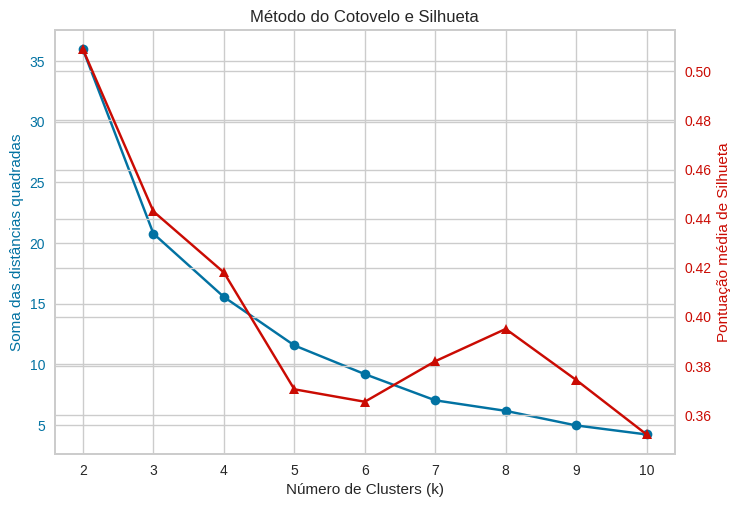

In [49]:
# Inicializar uma lista para armazenar os valores de soma das distâncias quadradas
ssd_values = []

# Inicializar uma lista para armazenar as pontuações de silhueta médias
silhouette_scores = []

# Definir uma faixa de valores de k a serem testados
k_values = range(2, 11)

# Realizar a clusterização para cada valor de k e calcular a soma das distâncias quadradas e as pontuações de silhueta
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(dados_padronizados)
    ssd_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(dados_padronizados, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico do método do cotovelo e da silhueta em um único gráfico
fig, ax1 = plt.subplots()

# Gráfico do método do cotovelo
ax1.plot(k_values, ssd_values, 'bo-')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Soma das distâncias quadradas', color='b')
ax1.tick_params('y', colors='b')

# Gráfico da silhueta
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, 'r^-')
ax2.set_ylabel('Pontuação média de Silhueta', color='r')
ax2.tick_params('y', colors='r')

# Título e rótulos
plt.title('Método do Cotovelo e Silhueta')
plt.xlabel('Número de Clusters (k)')

plt.show()

Melhor valor aqui seria k=2, mas visualmente considero k=4 melhor e usando ANOVA e o teste de Turkey, fico com 4 clusters

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

A clusterização com mais de duas variáveis pode ser realizada com a aplicação de técnicas de redução de dimensionalidade, que visam simplificar os dados sem perder muitas informações. As técnicas mais populares são a Análise de Componentes Principais (PCA) e o t-SNE. Essas técnicas projetam os dados multidimensionais em um espaço de duas ou três dimensões, facilitando a visualização e a compreensão dos padrões nos dados.

A PCA, por exemplo, transforma o conjunto de dados original em um novo conjunto que é ordenado pela variância dos dados ao longo dos novos eixos. Os primeiros componentes principais capturam a maior parte da variabilidade nos dados, permitindo visualizá-los em um espaço bidimensional ou tridimensional.

Por outro lado, t-SNE é uma técnica não linear que preserva as relações locais dos pontos, tornando-a especialmente boa para visualizar agrupamentos em dados de alta dimensão.

Entretanto, vale ressaltar que a interpretação dos resultados dessas técnicas requer cuidado, uma vez que a redução de dimensionalidade pode distorcer as distâncias originais entre os pontos.

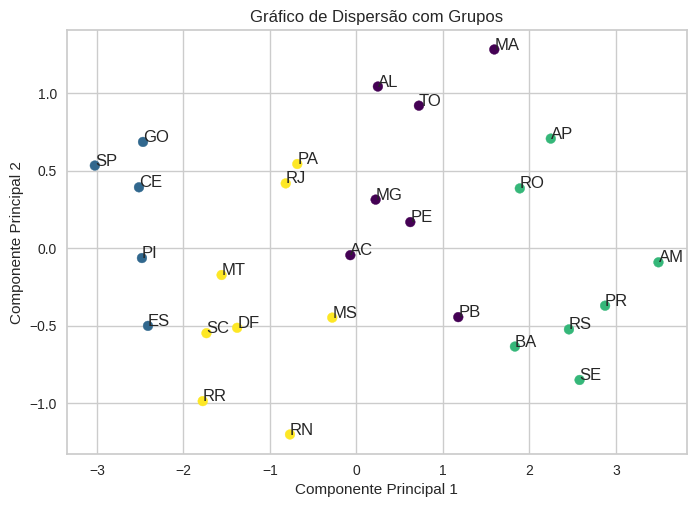

In [50]:
# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
dados_reduzidos = pca.fit_transform(dados_padronizados)

# Definir o valor de k escolhido para a clusterização
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(dados_reduzidos)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Criar um DataFrame com os dados reduzidos e os nomes dos estados
dados_reduzidos_df = pd.DataFrame(dados_reduzidos, columns=['Componente Principal 1', 'Componente Principal 2'])
dados_reduzidos_df['estado'] = estados

# Visualizar os grupos em um gráfico de dispersão com as duas principais componentes do PCA
plt.scatter(dados_reduzidos_df['Componente Principal 1'], dados_reduzidos_df['Componente Principal 2'], c=labels, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersão com Grupos')

# Adicionar os nomes dos estados nos pontos do gráfico
for i, row in dados_reduzidos_df.iterrows():
    plt.annotate(row['estado'], (row['Componente Principal 1'], row['Componente Principal 2']))

plt.show()


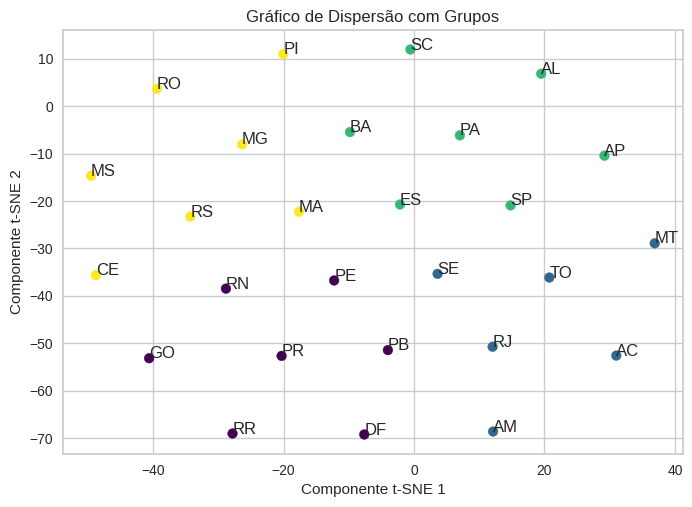

In [51]:
# Redução de dimensionalidade usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
dados_reduzidos = tsne.fit_transform(dados_padronizados)

# Definir o valor de k escolhido para a clusterização
k = 4

# Realizar a clusterização com o valor de k escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(dados_reduzidos)

# Adicionar as labels de cluster ao DataFrame original
dados_selecionados['cluster'] = labels

# Criar um DataFrame com os dados reduzidos e os nomes dos estados
dados_reduzidos_df = pd.DataFrame(dados_reduzidos, columns=['Componente t-SNE 1', 'Componente t-SNE 2'])
dados_reduzidos_df['estado'] = estados

# Visualizar os grupos em um gráfico de dispersão com as duas componentes do t-SNE
plt.scatter(dados_reduzidos_df['Componente t-SNE 1'], dados_reduzidos_df['Componente t-SNE 2'], c=labels, cmap='viridis')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Gráfico de Dispersão com Grupos')

# Adicionar os nomes dos estados nos pontos do gráfico
for i, row in dados_reduzidos_df.iterrows():
    plt.annotate(row['estado'], (row['Componente t-SNE 1'], row['Componente t-SNE 2']))

plt.show()